In [1]:
import sys, os, glob, h5py
import time, datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Load the modules
sys.path.insert(1, "/home/nexus-admin/NEXUS_RF/BackendTools")
import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf
import TimestreamHelperFunctions as Thf

In [3]:
## MB Results come from fitting a temperature scan at a specified RF power
MB_fit_vals = np.array([4.24216+9.75e-6, 
                        0.177  ,
                        0.0125 ,
                        4.1e7  ]) ## [ F0 [GHz] , Delta , alpha , Qi0 ]

## How much attenuation is in the lines before the chip
line_atten_dB = 56.5

In [4]:
## 6/07 Al Runs
series_list = np.array([
#     "20220607_095300" , 
    "20220607_100452" , 
    "20220607_100858" , 
    "20220607_101139" , 
    "20220607_102016" , 
    "20220607_102257" , 
    "20220607_102619" , 
    "20220607_103040" , 
    "20220607_103312" , 
    "20220607_103536" , 
    "20220607_103820" , 
    "20220607_104103" , 
    "20220607_104418" , 
    "20220607_104739" , 
#     "20220607_105011" 
])

P_min = -70 ; P_max = 0 ; P_step = 5
powers_list = np.arange(start=P_min, stop=P_max+P_step, step=P_step)[1:-1]

In [5]:
## 6/19 Al Runs
series_list = np.array([
    "20220619_155709",
    "20220619_153053",
    "20220619_152817",
    "20220619_152542",
    "20220619_152210",
    "20220619_151914",
#     "20220619_151634",
#     "20220619_151405",
#     "20220619_150933",
#     "20220619_150645",
#     "20220619_150415",
#     "20220619_150117",
#     "20220619_145802",
#     "20220619_145536",
#     "20220619_145204"
])

P_min = -70 ; P_max = 0 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)[:6]#[3:-1]

In [6]:
## 6/19 Nb7 Runs
series_list = np.array([
#     "20220619_171322",
#     "20220619_171119",
#     "20220619_170714",
    "20220619_170214",
    "20220619_170017",
    "20220619_165127",
    "20220619_164921",
    "20220619_164721",
    "20220619_164257",
    "20220619_164056",
    "20220619_162829",
    "20220619_162632",
    "20220619_161836",
    "20220619_161640",
    "20220619_160446"
])

P_min = -70 ; P_max = 0 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)[3:]

In [7]:
## 6/30 Al Runs - Shield Open, No Laser
series_list = np.array([
    "20220630_090941",
    "20220630_090827",
    "20220630_090713",
    "20220630_090559",
    "20220630_090445",
    "20220630_090331",
    "20220630_090217",
    "20220630_090103",
    "20220630_085949",
    "20220630_085835",
    "20220630_085721",
    "20220630_085600"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [8]:
## 6/30 Al Runs - Shield Closed, No Laser, people in clean room
series_list = np.array([
    "20220630_120041",
    "20220630_115927",
    "20220630_115813",
    "20220630_115659",
    "20220630_115545",
    "20220630_115431",
    "20220630_115317",
    "20220630_115203",
    "20220630_115049",
    "20220630_114935",
    "20220630_114821",
    "20220630_114700"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [9]:
## 6/30 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20220630_155428",
    "20220630_155320",
    "20220630_155212",
    "20220630_155104",
    "20220630_154956",
    "20220630_154848",
    "20220630_154740",
    "20220630_154632",
    "20220630_154524",
    "20220630_154416",
    "20220630_154308",
    "20220630_154154"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [10]:
## 7/6 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20220706_164154",
    "20220706_164040",
    "20220706_163926",
    "20220706_163812",
    "20220706_163658",
    "20220706_163544",
    "20220706_163430",
    "20220706_163316",
    "20220706_163202",
    "20220706_163048",
    "20220706_162934",
    "20220706_162814"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [11]:
## 10/19 Al Runs - Shield Open, No Laser
series_list = np.array([
    "20221019_121526",
    "20221019_121708",
    "20221019_121843",
    "20221019_122019",
    "20221019_122154",
    "20221019_122329",
    "20221019_122504",
    "20221019_122639",
    "20221019_122815",
    "20221019_122951"
])

P_min = -60 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)[::-1]

In [12]:
## 10/28 Al Runs - Shield Open, No Laser
series_list = np.array([
    "20221028_150303",
    "20221028_150154",
    "20221028_150045",
    "20221028_145936",
    "20221028_145827",
    "20221028_145718",
    "20221028_145609",
    "20221028_145500",
    "20221028_145352",
    "20221028_145244",
    "20221028_145136",
    "20221028_145021"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [13]:
## 2/22 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20230222_083158",
    "20230222_083028",
    "20230222_082858",
    "20230222_082729",
    "20230222_082558",
    "20230222_082428",
    "20230222_082258",
    "20230222_082128",
    "20230222_081959",
    "20230222_081831",
    "20230222_081700",
    "20230222_081524"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [14]:
## 4/10 Al Runs - Shield Open, No Laser
series_list = np.array([
    "20230410_120536",
    "20230410_120407",
    "20230410_120238",
    "20230410_120110",
    "20230410_115942",
    "20230410_115814",
    "20230410_115640"
])

P_min = -60 ; P_max = -30 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [15]:
## 7/6 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20230706_202033",
    "20230706_201904",
    "20230706_201735",
    "20230706_201606",
    "20230706_201437",
    "20230706_201308",
    "20230706_201139",
    "20230706_201010",
    "20230706_200841",
    "20230706_200713",
    "20230706_200545",
    "20230706_200409"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [16]:
## 7/13 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20230713_143502",
    "20230713_143636",
    "20230713_143804",
    "20230713_143932",
    "20230713_144101",
    "20230713_144230",
    "20230713_144359",
    "20230713_144528",
    "20230713_144657",
    "20230713_144826",
    "20230713_144955",
    "20230713_145124"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)[::-1]

In [17]:
for i in np.arange(len(series_list)):
    print(series_list[i], ":", powers_list[i], "dBm")

20230713_143502 : -70 dBm
20230713_143636 : -65 dBm
20230713_143804 : -60 dBm
20230713_143932 : -55 dBm
20230713_144101 : -50 dBm
20230713_144230 : -45 dBm
20230713_144359 : -40 dBm
20230713_144528 : -35 dBm
20230713_144657 : -30 dBm
20230713_144826 : -25 dBm
20230713_144955 : -20 dBm
20230713_145124 : -15 dBm


In [18]:
powers_on_device = powers_list - line_atten_dB
for i in np.arange(len(series_list)):
    print(series_list[i], ":", powers_on_device[i], "dBm")

20230713_143502 : -126.5 dBm
20230713_143636 : -121.5 dBm
20230713_143804 : -116.5 dBm
20230713_143932 : -111.5 dBm
20230713_144101 : -106.5 dBm
20230713_144230 : -101.5 dBm
20230713_144359 : -96.5 dBm
20230713_144528 : -91.5 dBm
20230713_144657 : -86.5 dBm
20230713_144826 : -81.5 dBm
20230713_144955 : -76.5 dBm
20230713_145124 : -71.5 dBm


In [19]:
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series_list[3], verbose=True)
metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
print(avg_frqs, avg_S21s)

Line Delay file:  None
VNA scan file:    USRP_VNA_20230713_143932.h5
Noise ts files:   ['USRP_Noise_20230713_143932_delta0.h5']
Laser ts files:   []
Summary file:	 noise_averages_20230713_143932.h5
[4241.960018 4241.960901 4241.961783] [0.00132202+0.00085954j 0.00126977+0.0009207j  0.00122619+0.00100726j]


Will separate data into  1000 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
Will convert to resonator basis!
Will convert to quasiparticle basis!
doing additional decimation by factor of 20
sampling frequency plugged into welch is 50000
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230713/20230713_143932/USRP_Noise_20230713_143932_delta0.h5 because override=True!
found 2 pulses
chunk length plugged into welch is 500
chunked data into 1000 timestreams
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230713/20230713_143932/USRP_Noise_20230713_143932_delta0_cleaned.h5 because override=True!
number of chunks used to average is 923
Converting to resonator basis!
Fr from fit  [GHz]: 4241.960900542607
Fr min curve [GHz]: 4241.960552537526
Fr from fit  [GHz]: 4241.

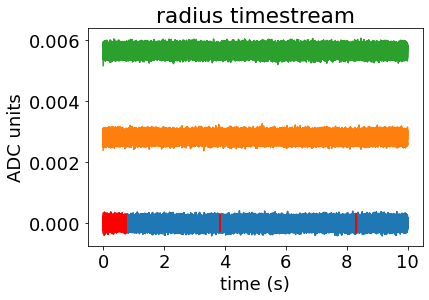

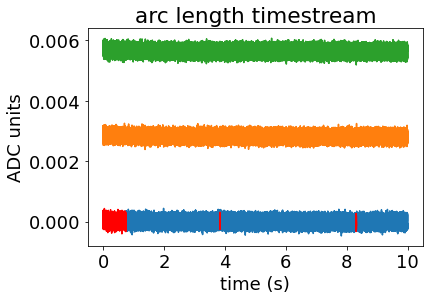

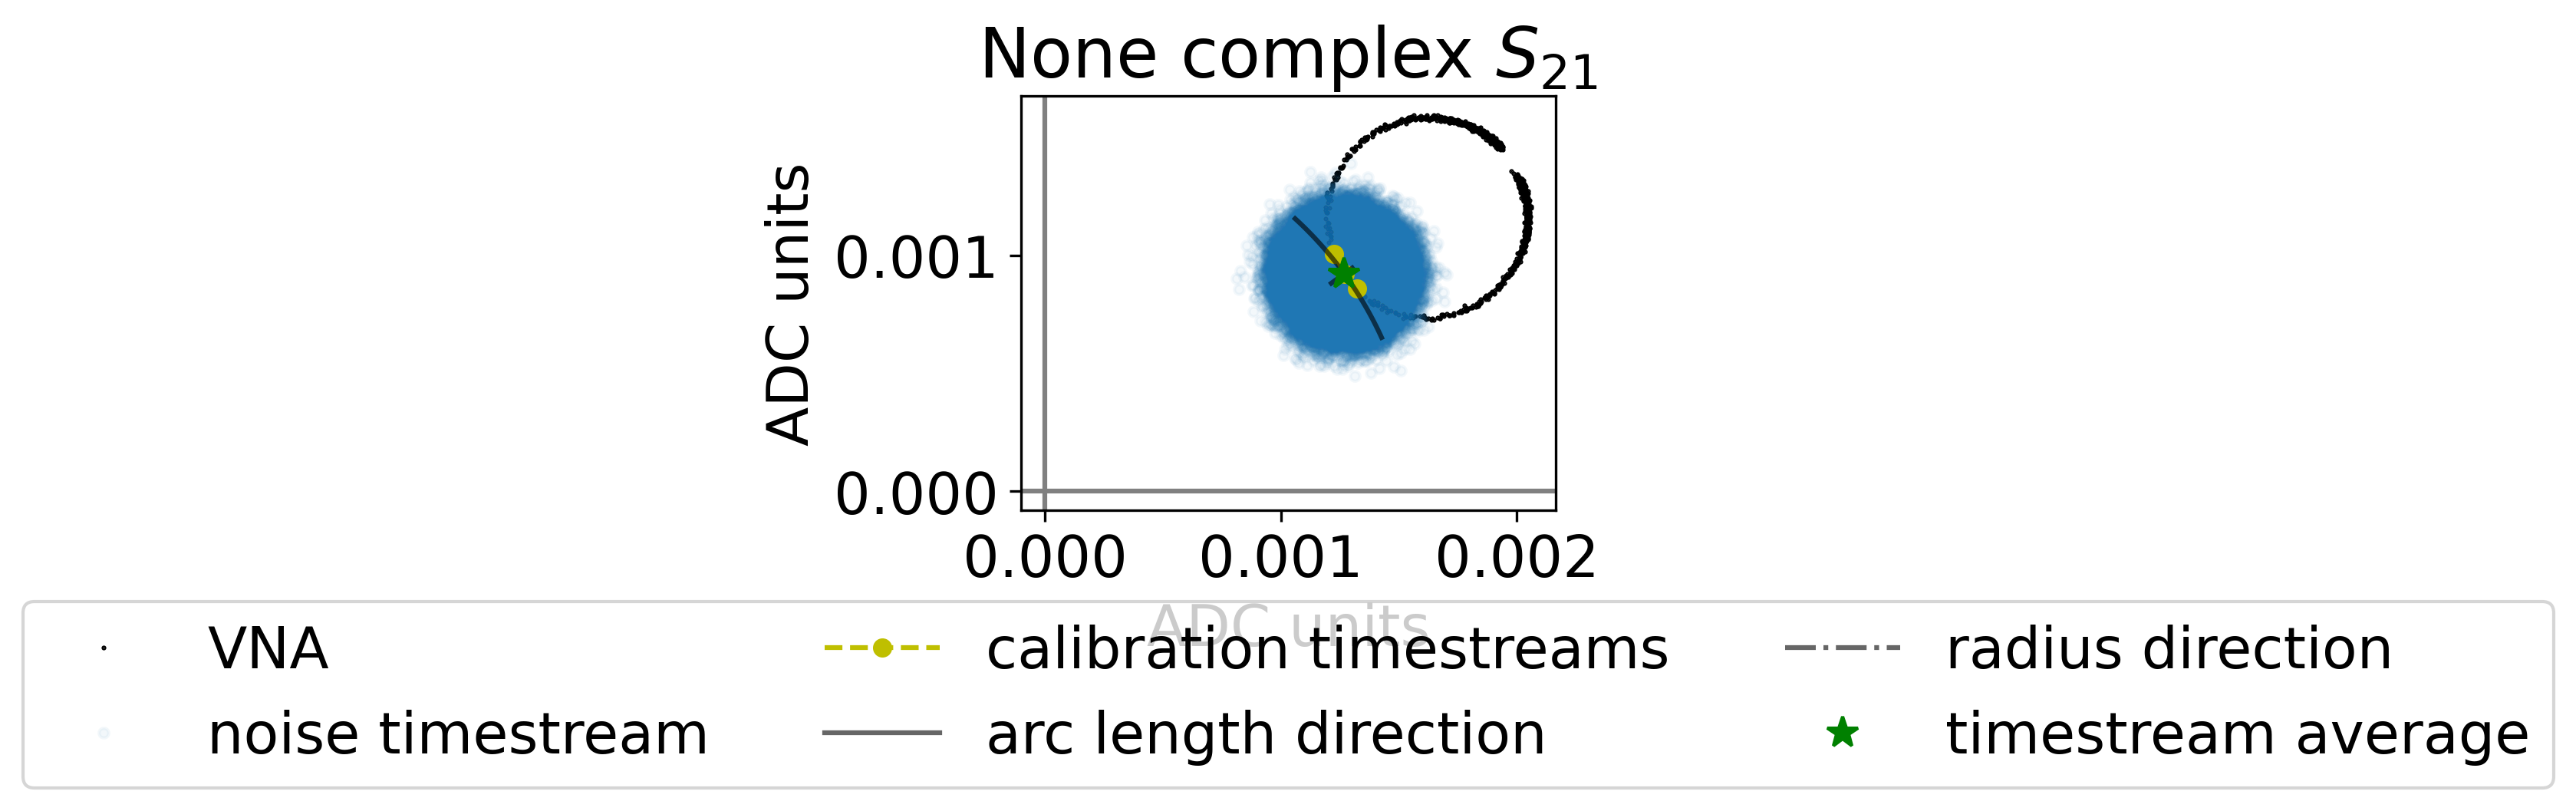

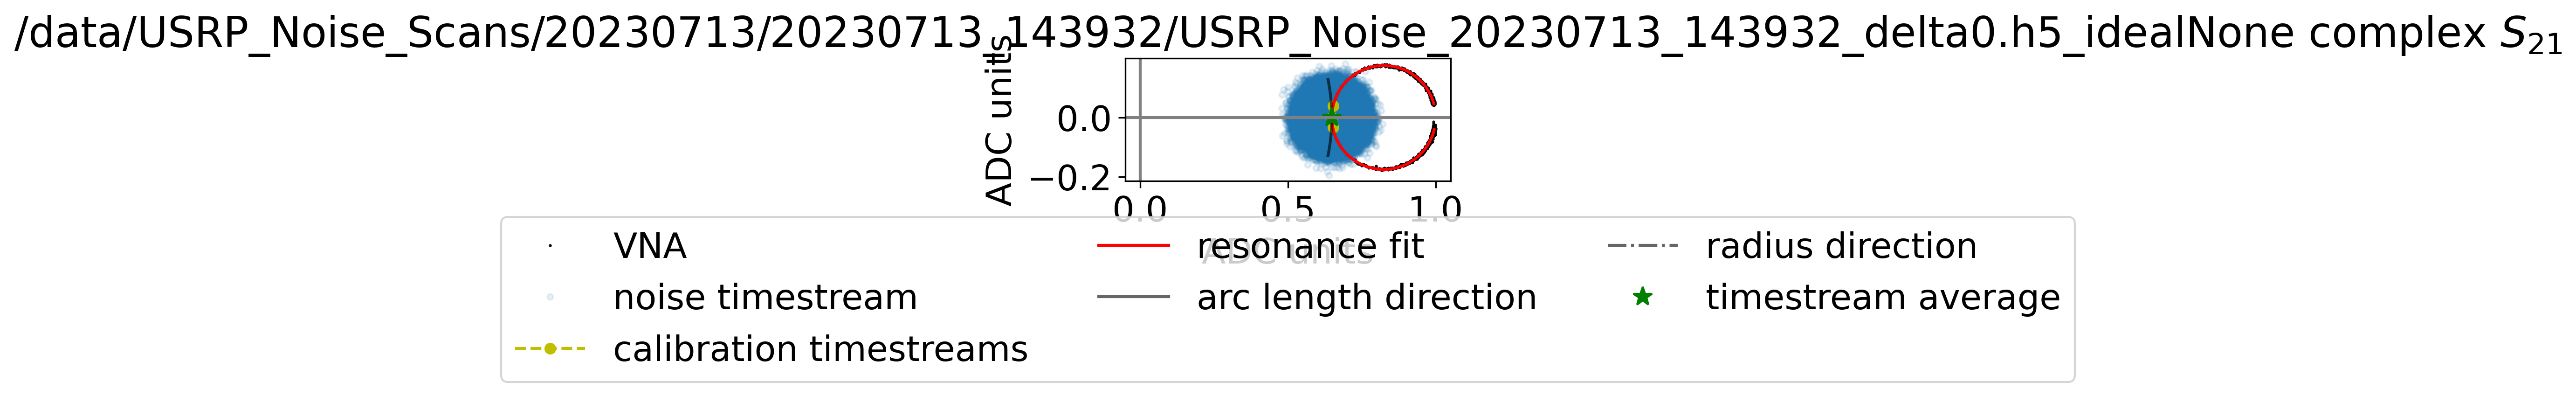

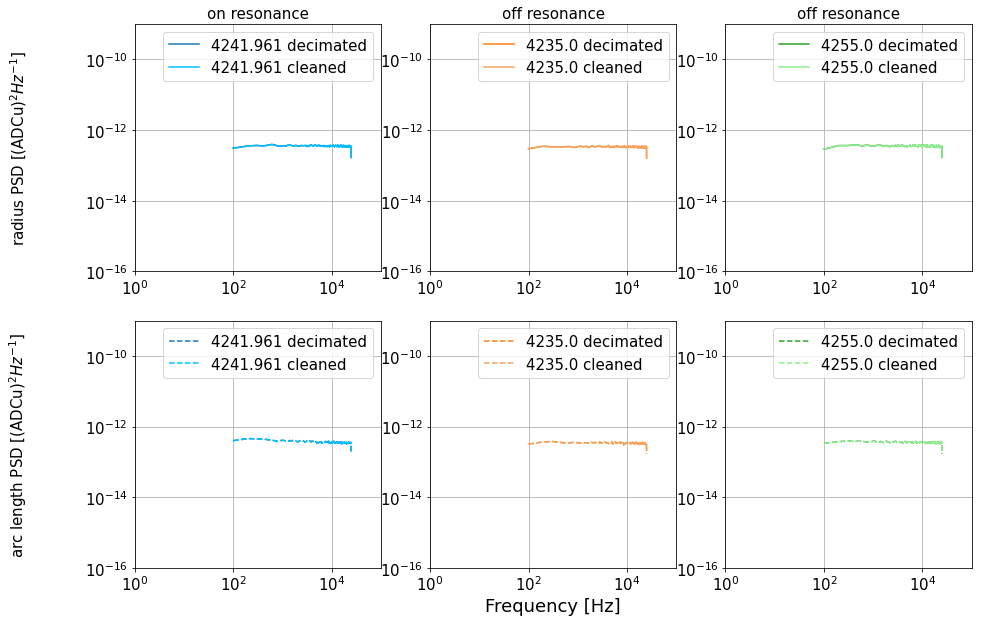

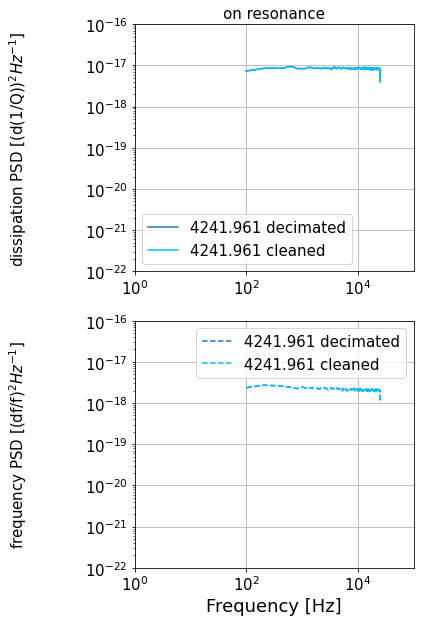

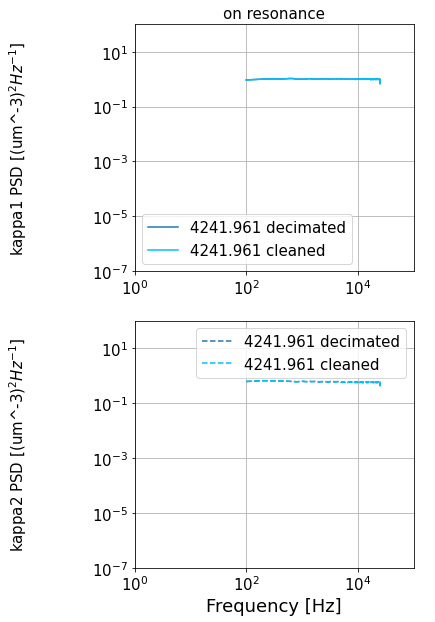

In [20]:
powers, PSDs, res, timestreams = Thf.CleanPSDs(tone_files[0], vna_file, f_transient=0.075,
                                               charFs = avg_frqs,
                                               charZs = avg_S21s,
                                               MBresults = MB_fit_vals)

In [21]:
PSDs.keys()

dict_keys(['f', 'radius', 'arc', 'radius uncleaned', 'arc uncleaned', 'fractional radius', 'fractional arc', 'dissipation uncleaned', 'frequency uncleaned', 'dissipation', 'frequency', 'kappa_1', 'kappa_2', 'kappa_1 uncleaned', 'kappa_2 uncleaned'])

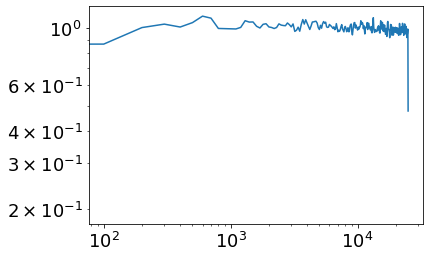

In [22]:
plt.loglog(PSDs['f'],PSDs['kappa_1'])

In [23]:
del powers, PSDs, res, timestreams

## Now package it all together

In [28]:
%matplotlib notebook
# plt.rcParams.update({'font.size': 16})

<IPython.core.display.Javascript object>


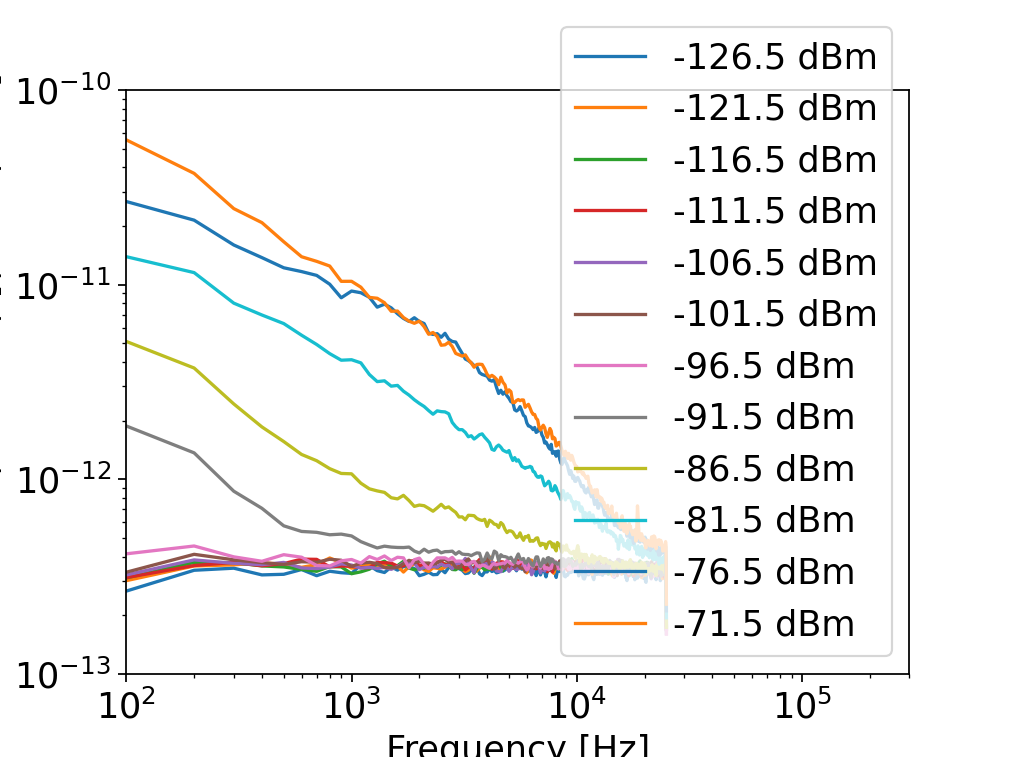

<IPython.core.display.Javascript object>


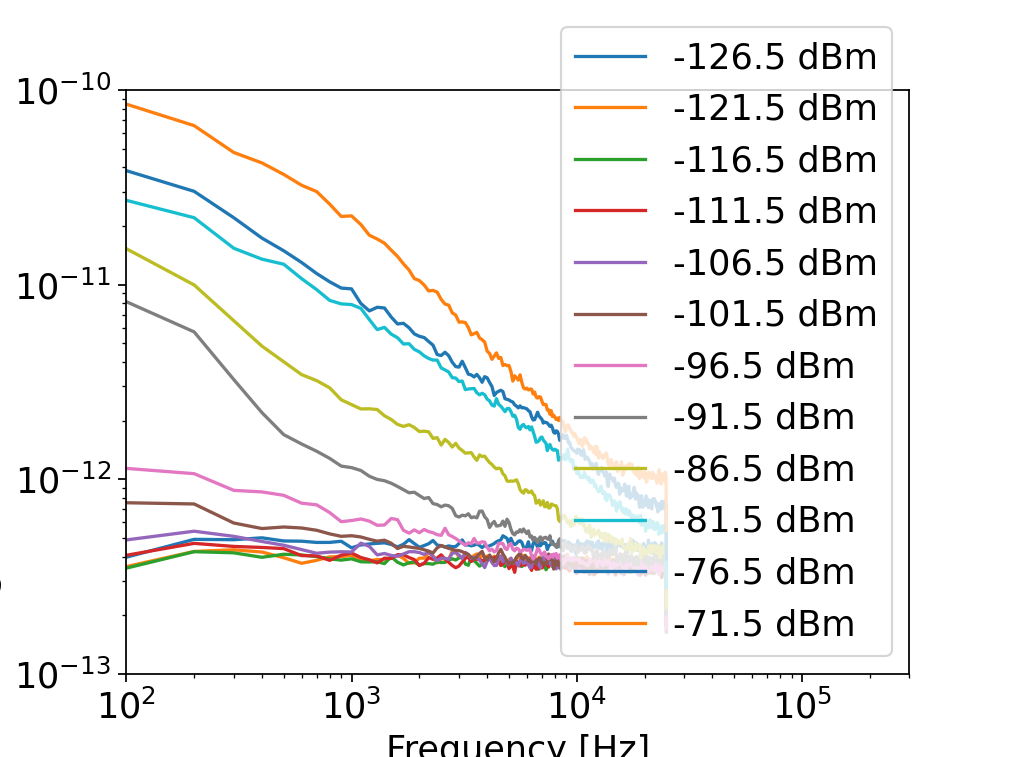

<IPython.core.display.Javascript object>


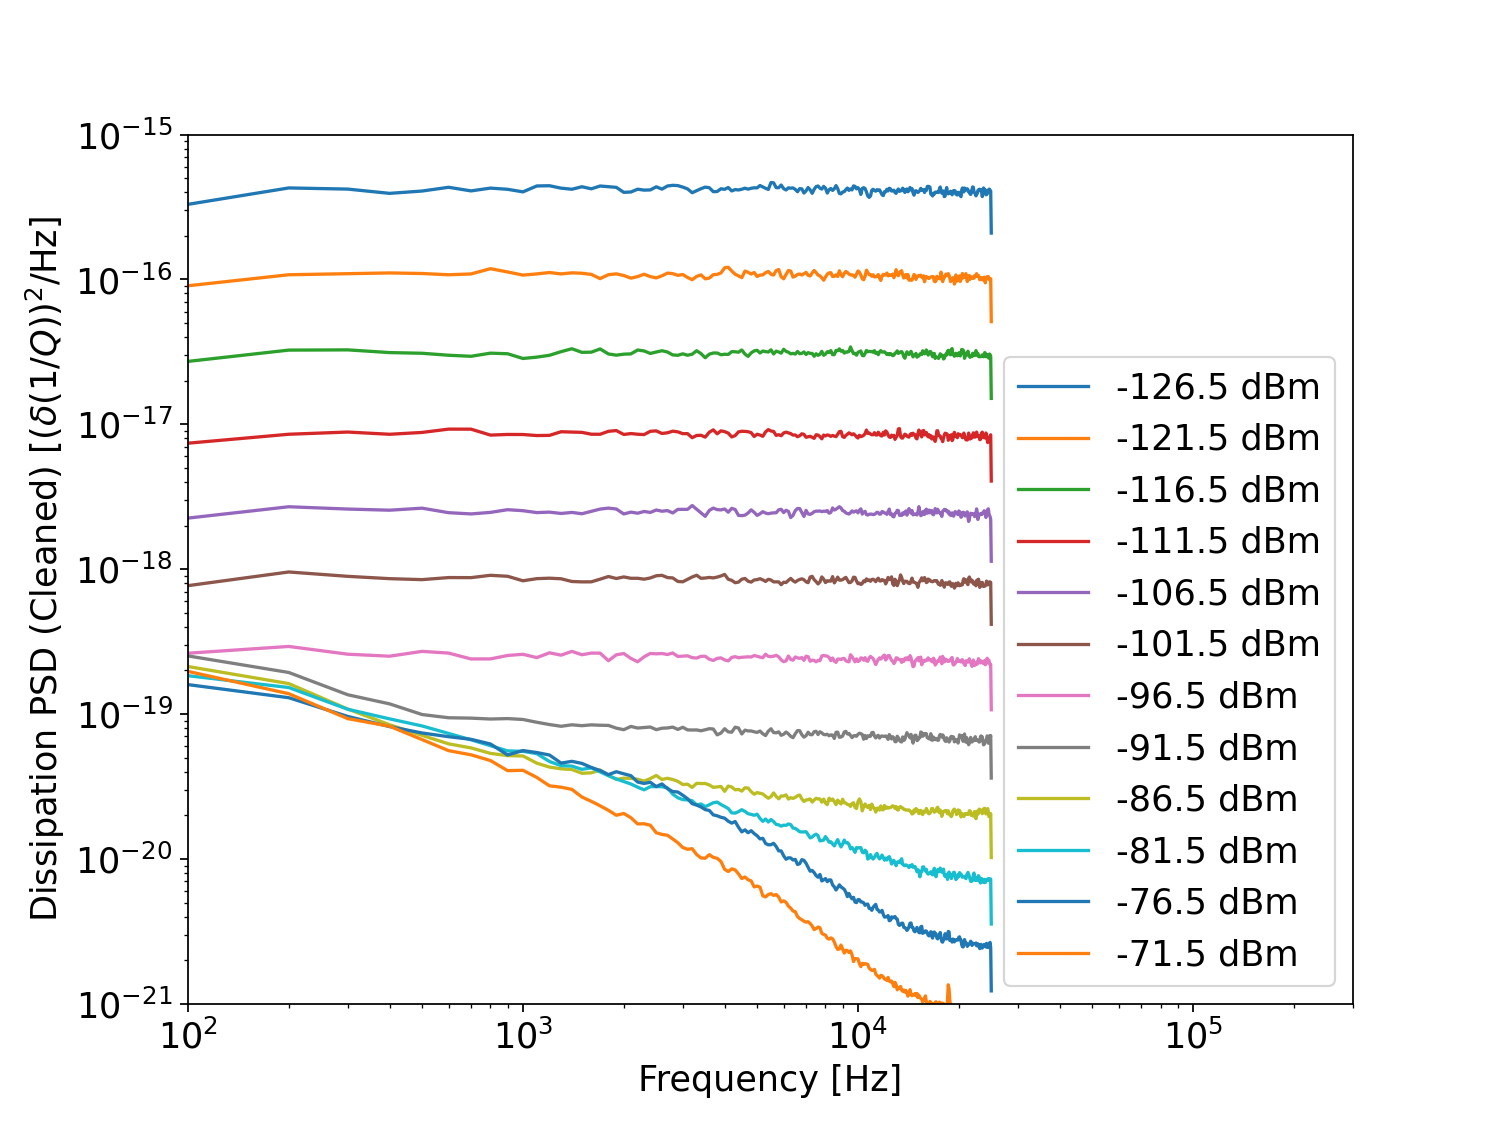

<IPython.core.display.Javascript object>


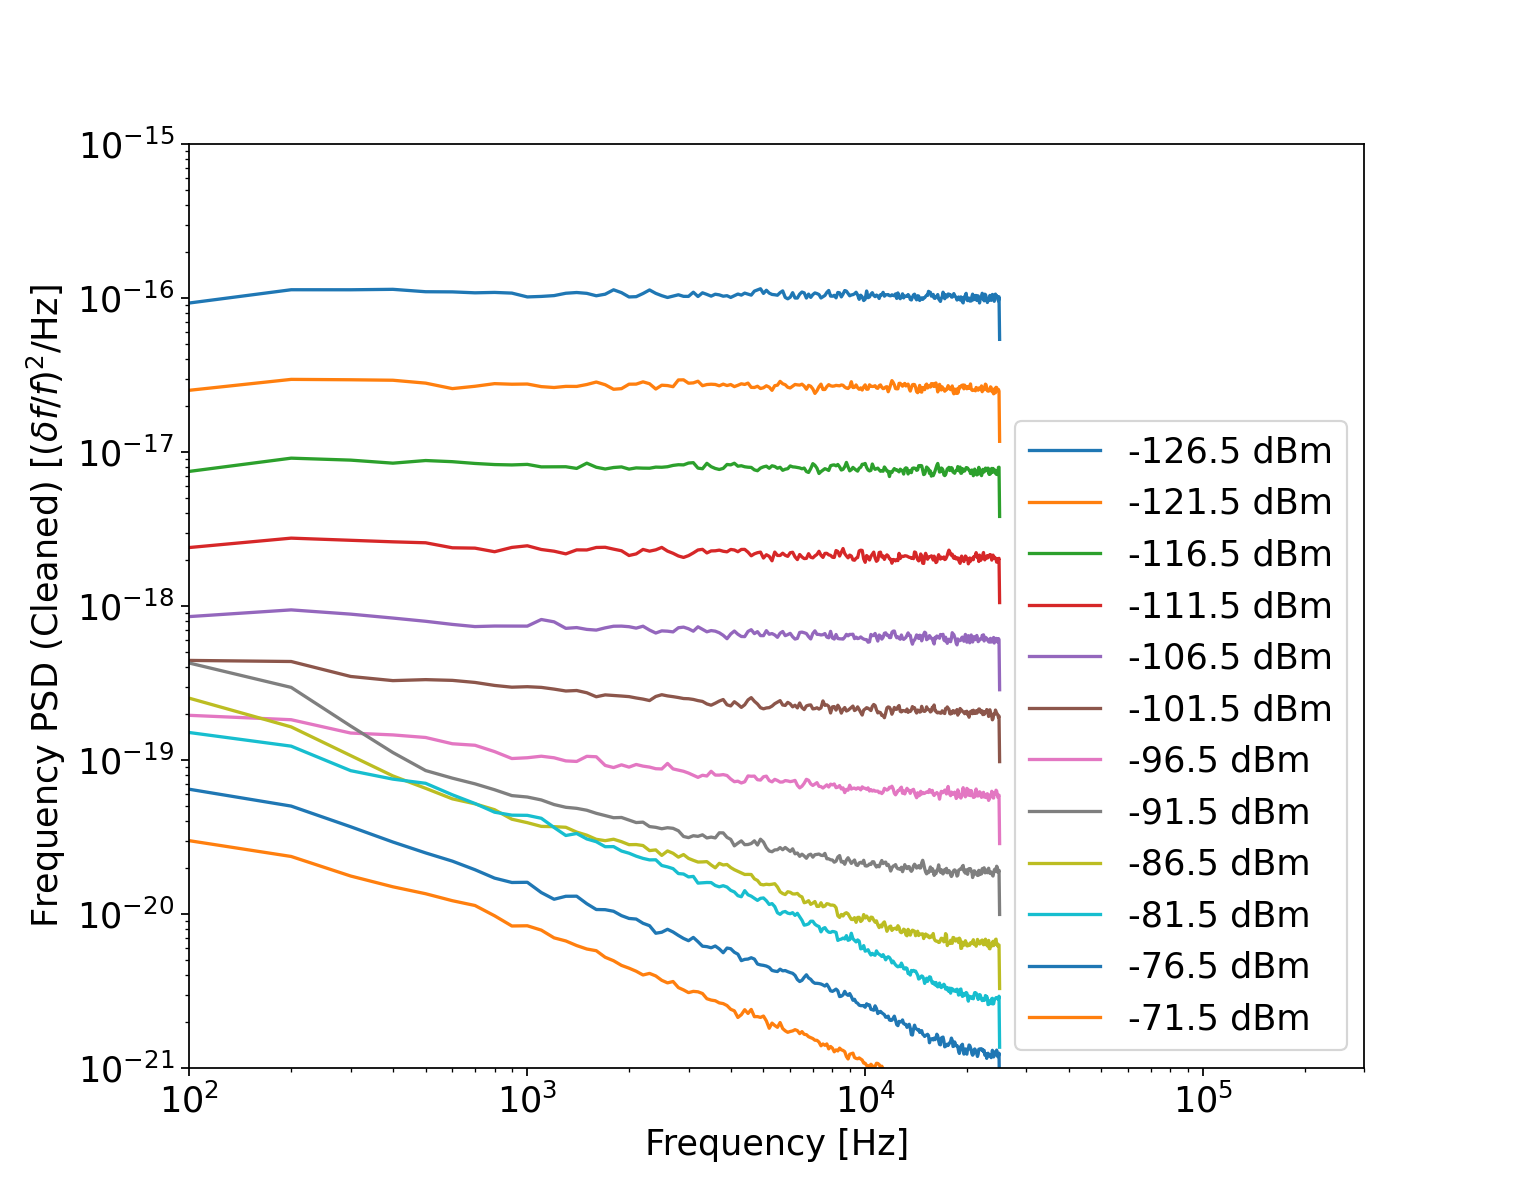

<IPython.core.display.Javascript object>


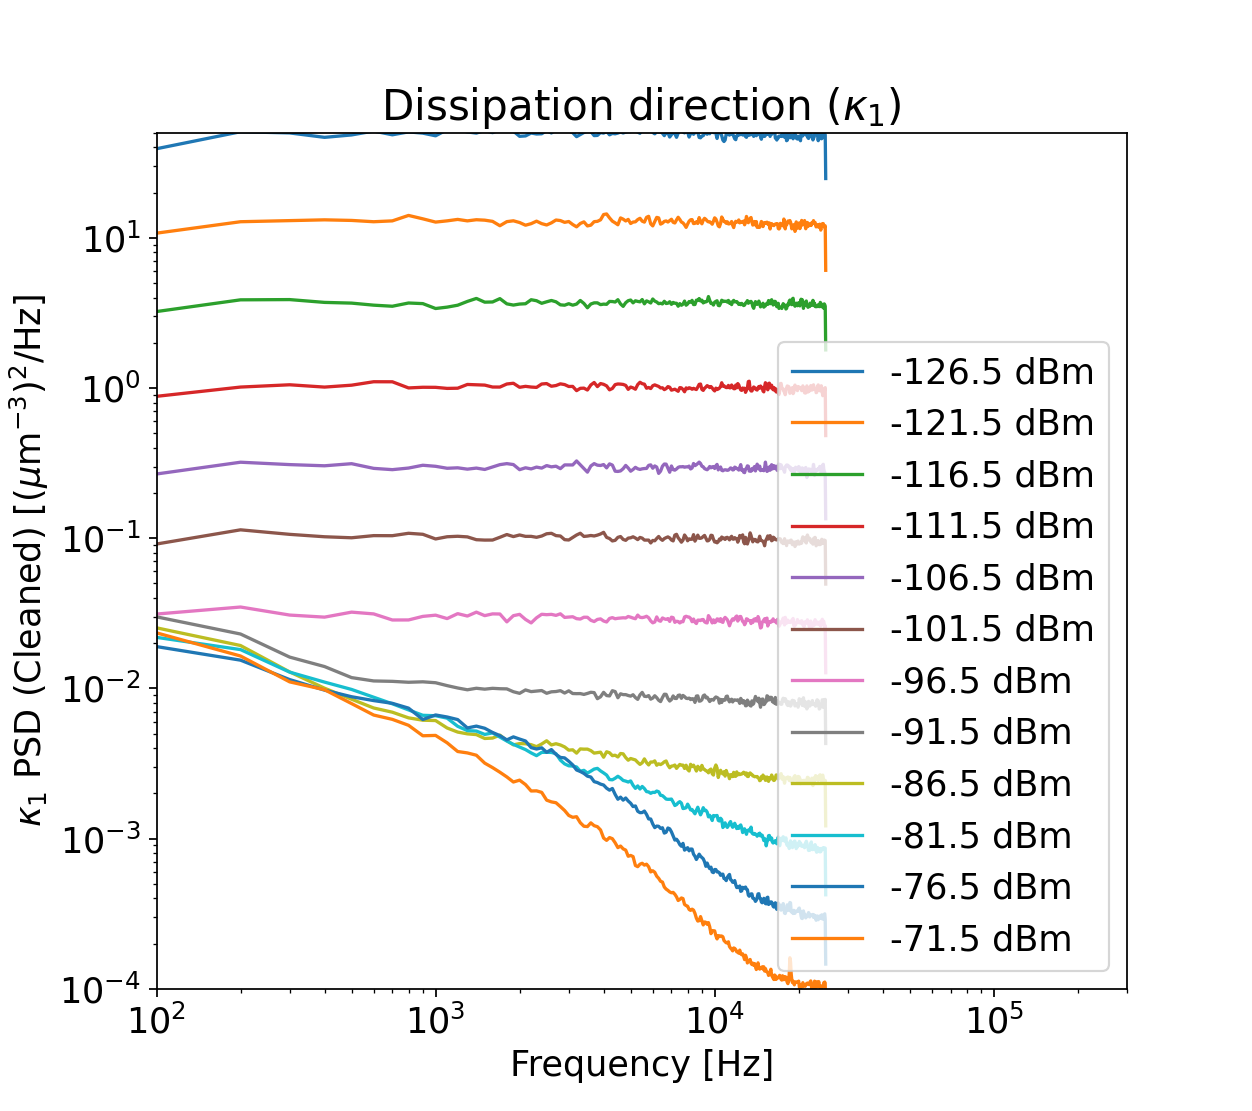

<IPython.core.display.Javascript object>


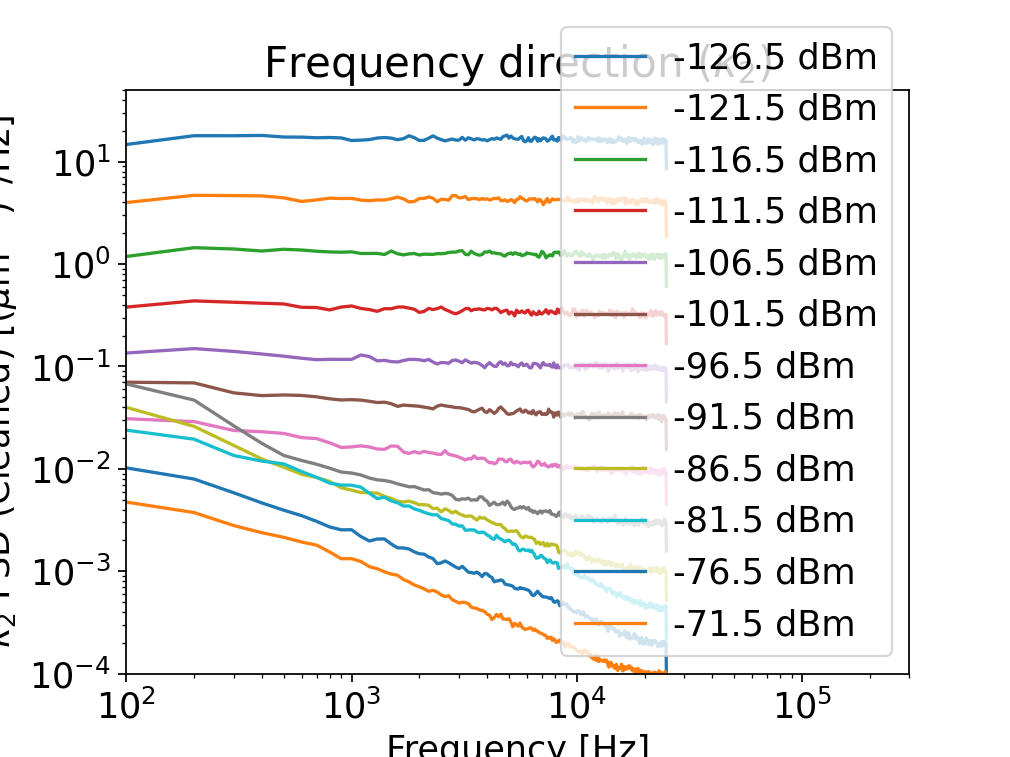

pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230713/20230713_143502/USRP_Noise_20230713_143502_delta0.h5 because override=True!
found 8 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230713/20230713_143502/USRP_Noise_20230713_143502_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230713/20230713_143636/USRP_Noise_20230713_143636_delta0.h5 because override=True!
found 11 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230713/20230713_143636/USRP_Noise_20230713_143636_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
Converting to quasiparticle basis!
pulse time data already exists! If you set override=False

In [29]:
PSD_lo_Hz = 1e2
PSD_hi_Hz = 5e4

Thf.PlotPSDsByPower(series_list, powers_on_device, 
    PSD_lo_f=PSD_lo_Hz, PSD_hi_f=5e4, fHz_range = [PSD_lo_Hz,3e5], 
    e_b_PSDrange = [1e-13,1e-10], r_b_PSDrange = [1e-21,1e-15], 
    q_b_PSDrange = [1e-4,5e1], MB_fit_result=MB_fit_vals)